# Day 5 Challenge

In [2]:
with open("day6.txt", "r") as file:
    input_text = file.read()
input_list = input_text.split("\n")
input_list.sort()
input_list = list(map(lambda x: x.split(")"), input_list))

In [3]:
input_dict = {}
for element in input_list:
    if element[0] not in input_dict.keys():
        input_dict[element[0]] = []
    input_dict[element[0]].append(element[1])

## First Part

In [4]:
new_origins = ["COM"]

origin_distance = 0

univers = {"COM": origin_distance}

for _ in range(1, 10000, 1):
    
    origin_distance += 1
    origins = new_origins
    new_origins = []
    
    for element in origins:
        
        try:
            for star in input_dict[element]:
                new_origins.append(star)
                univers[star] = origin_distance
        except:
            continue

In [5]:
total = 0
for key in univers.keys():
    total += univers[key]
total

344238

## Second Part

In [6]:
import networkx

In [7]:
g = networkx.Graph()
for element in univers.keys():
    g.add_node(element)

In [8]:
for element in input_list:
    g.add_edge(element[0], element[1])

In [13]:
# minus 3 since we need the distances not objects (SAN=1, YOU=1, -1)
len(networkx.shortest_path(g, "YOU", "SAN"))-3

436

In [12]:
# minus 2 since we require the distance between orbited objects
networkx.shortest_path_length(g, "SAN", "YOU")-2

436

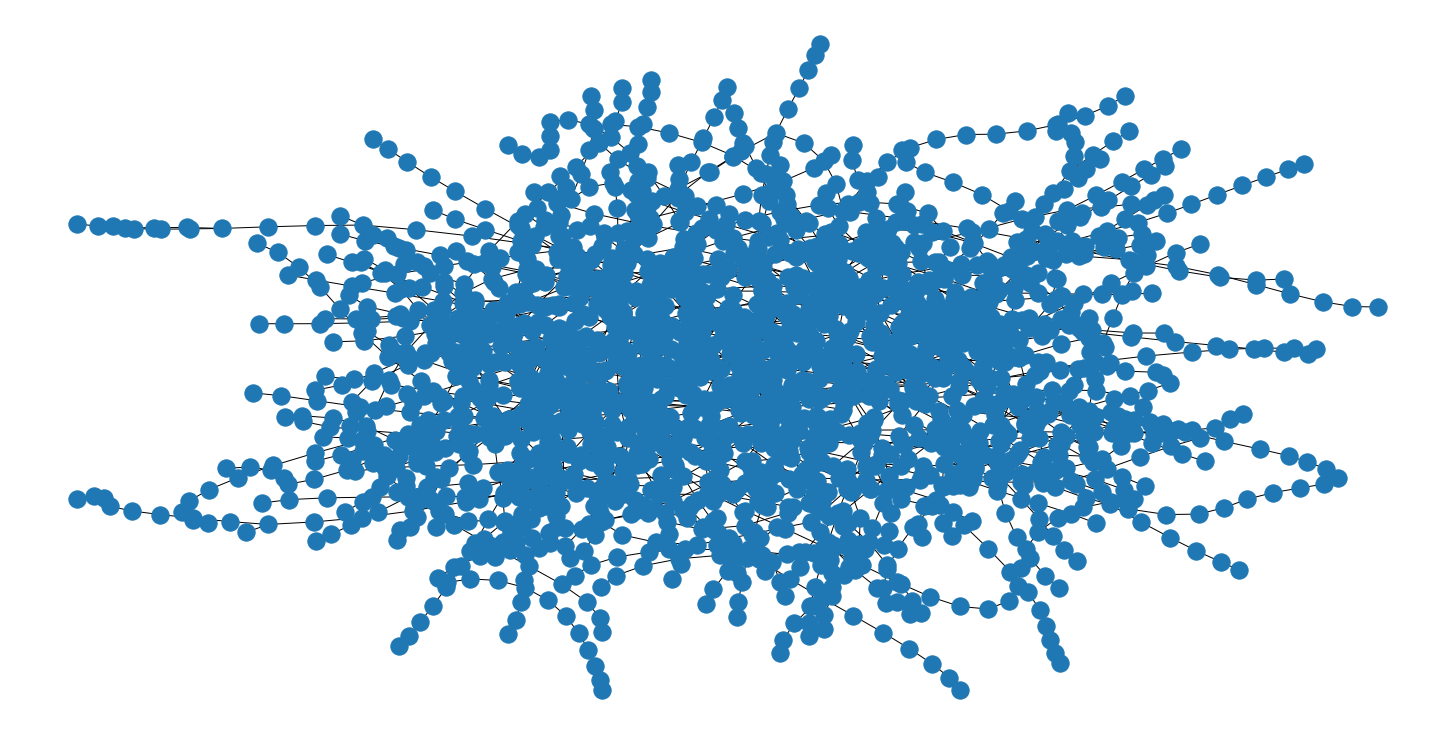

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
networkx.draw(g)
plt.show()